In [120]:
import numpy as np

In [135]:
class NeuralNetwork:
    
    def __init__(self):
        np.random.seed(1)
        self.input_layersize = 2
        self.hidden_layersize1 = 5
        self.hidden_layersize2 = 5
        self.output_layer = 1
        
        self.w1 = np.random.randn(self.input_layersize, self.hidden_layersize1)
        self.w2 = np.random.randn(self.hidden_layersize1, self.hidden_layersize2)
        self.w3 = np.random.randn(self.hidden_layersize2, self.output_layer)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return np.exp(-x) / ((1 + np.exp(-x)) ** 2)
    
    def forward_propagate(self, x):
        self.z2 = np.dot(x, self.w1)
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = np.dot(self.a2, self.w2)
        self.a3 = self.sigmoid(self.z3)
        
        self.z4 = np.dot(self.a3 , self.w3)
        self.y_hat = self.sigmoid(self.z4)
        return self.y_hat
    
    def backward_propigate(self, x, y):
        self.y_hat = self.forward_propagate(x)
        
        delta3 = np.multiply(-(y - self.y_hat), self.sigmoid_prime(self.z4))
        djdw3 = np.dot(self.a3.T, delta3)
        
        delta2 = np.dot(delta3, self.w3.T) * self.sigmoid_prime(self.z3)
        djdw2 = np.dot(self.a2.T, delta2)
        
        delta = np.dot(delta2, self.w2.T) * self.sigmoid_prime(self.z2)
        djdw1 = np.dot(x.T, delta)
        
        return djdw1, djdw2, djdw3
    
    def cost_function(self,x, y):
        self.y_hat = self.forward_propagate(x)
        j = 0.5 * sum((y - self.y_hat) ** 2)
        return j
    
    def train(self, x, y):
        self.iteration = 100000
        self.learning_rate = 0.1
        
        for i in range(self.iteration):
            djdw1, djdw2, djdw3 = neural_network.backward_propigate(x, y)
    
            self.w1 = self.w1 - learning_rate * djdw1
            self.w2 = self.w2 - learning_rate * djdw2
            self.w3 = self.w3 - learning_rate * djdw3

            if (i % 10000) == 0:
                print(self.cost_function(x, y))

In [136]:

file = r"C:\Users\JIMIT JAISHWAL\Documents\CourseraML-master\ex2\data/ex2data2.txt"

from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

df = pd.read_csv(file,header = 0)
df.columns = ["grade1","grade2","label"]
# x = df["label"].map(lambda x: float(x.rstrip(';')))

# formats the input data into two arrays, one of independant variables
# and one of the dependant variable
X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["label"]
Y = np.array(Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

Y.shape = (117, 1)

In [137]:
neural_network = NeuralNetwork()
neural_network.train(X, Y)

[ 17.24386366]
[ 11.16807185]
[ 11.03790699]
[ 10.98397671]
[ 10.95500679]
[ 10.93619636]
[ 10.91843725]
[ 10.52530844]
[ 6.18475409]
[ 5.58279397]


In [138]:
import matplotlib.pyplot as plt

In [139]:
def drow_plot(x, y, clf):
    h = .02  # step size in the mesh

    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.forward_propagate(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 4))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Blues)


    # plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(x[pos, 0], x[pos, 1],cmap=plt.cm.Blues, edgecolors='k')
    plt.scatter(x[neg, 0], x[neg, 1], cmap=plt.cm.Blues_r, edgecolors='k')

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Not Admitted', 'Admitted'])
    plt.show()

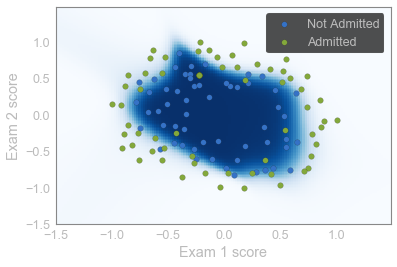

In [140]:
drow_plot(X, Y, neural_network)

In [141]:
result = []
y_pred = neural_network.forward_propagate(X)

for i in y_pred:
    if i >= 0.5:
        result.append(1)
    else:
        result.append(0)


accuracy_score(Y, np.array(result))

0.85470085470085466